In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_log_error, mean_squared_error

pd.set_option('display.max_columns', None)

from collections import Counter

from datetime import datetime

In [2]:
train=pd.read_csv('D:\\Data_sets\\movie\\train.csv')
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [3]:
train_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TrainAdditionalFeatures.csv')

In [4]:
train=pd.merge(train,train_additionalfeature, how='left', on=['imdb_id'])

In [5]:
train.loc[train['id'] == 16]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
15,16,NaN,500000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://skinningmovie.com/synopsis.htm,tt1129437,sr,Šišanje,Novica is a mathematics champion in a Belgrade...,1.018477,/88l8VBanH0lS5Wvzu2qgkGcsfQi.jpg,"[{'name': 'Hypnopolis', 'id': 51316}]","[{'iso_3166_1': 'RS', 'name': 'Serbia'}]",10/6/10,97.0,"[{'iso_639_1': 'sr', 'name': 'Srpski'}]",Released,Life is sometimes rude game: one mistake can b...,Skinning,"[{'id': 379, 'name': 'skinhead'}, {'id': 7492,...","[{'cast_id': 1001, 'character': 'Novica', 'cre...","[{'credit_id': '52fe4927c3a36847f818bb5f', 'de...",198,1.797,5.9,22.0


In [6]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

In [7]:
test=pd.read_csv('D:\\Data_sets\\movie\\test.csv')
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [8]:
test_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TestAdditionalFeatures.csv')

In [9]:
test=pd.merge(test,test_additionalfeature, how='left', on=['imdb_id'])

In [10]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
popularity2               179
rating                    179
totalVotes                179
dtype: int64

<AxesSubplot:xlabel='revenue', ylabel='Count'>

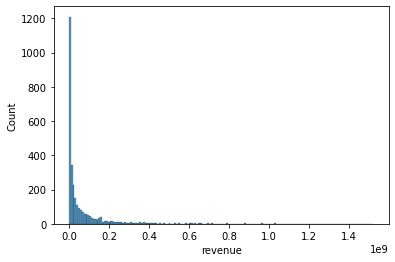

In [11]:
sns.histplot(train.revenue)

<AxesSubplot:xlabel='revenue', ylabel='Count'>

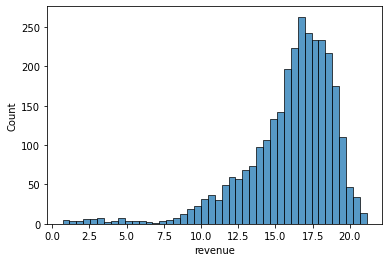

In [12]:
sns.histplot(np.log1p(train.revenue))

<AxesSubplot:xlabel='revenue', ylabel='Count'>

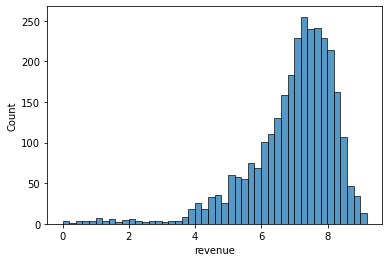

In [13]:
sns.histplot(np.log10(train.revenue))

<AxesSubplot:xlabel='popularity', ylabel='Count'>

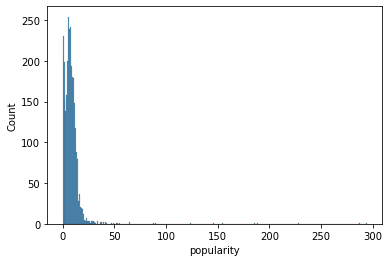

In [14]:
sns.histplot(train.popularity)

<AxesSubplot:xlabel='popularity', ylabel='Count'>

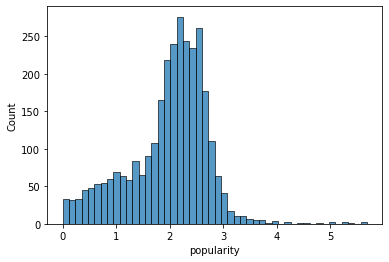

In [15]:
sns.histplot(np.log1p(train.popularity))

<AxesSubplot:xlabel='popularity2', ylabel='Count'>

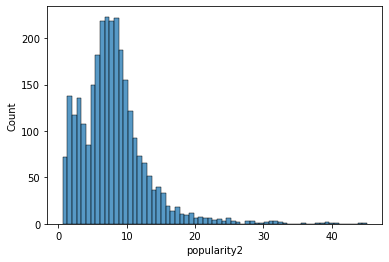

In [16]:
sns.histplot(train.popularity2)

<AxesSubplot:xlabel='popularity2', ylabel='Count'>

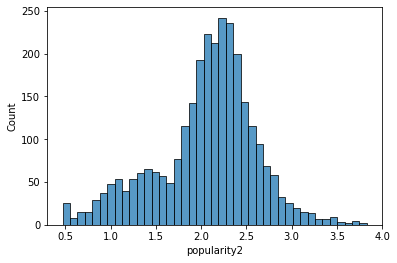

In [17]:
sns.histplot(np.log1p(train.popularity2))

<AxesSubplot:xlabel='runtime', ylabel='Count'>

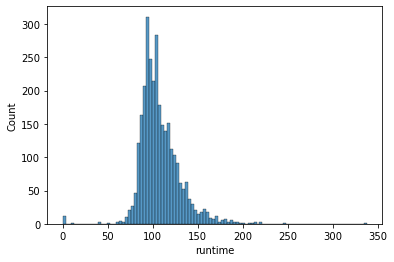

In [18]:
sns.histplot(train.runtime)

<AxesSubplot:xlabel='rating', ylabel='Count'>

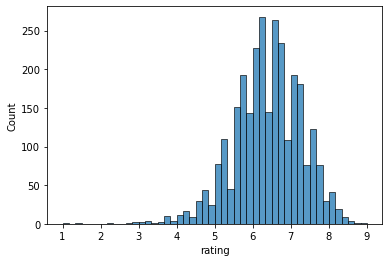

In [19]:
sns.histplot((train.rating))

<AxesSubplot:xlabel='totalVotes', ylabel='Count'>

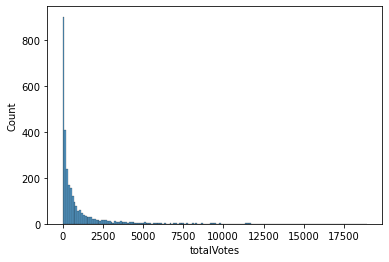

In [20]:
sns.histplot(train.totalVotes)

<AxesSubplot:xlabel='totalVotes', ylabel='Count'>

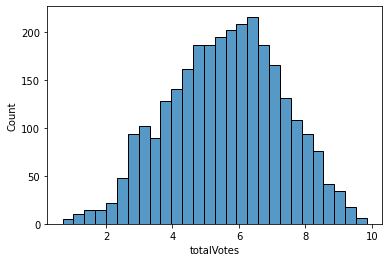

In [21]:
sns.histplot(np.log1p(train.totalVotes))

In [22]:
# train['popularity'] = np.log1p(train['popularity'])   #log(1+x)  #expm1 - inverse
# train['popularity2'] = np.log1p(train['popularity2'])
# train['budget'] = np.log1p(train['budget'])
# train['totalVotes'] = np.log1p(train['totalVotes'])
# train['revenue'] = np.log1p(train['revenue'])

In [23]:
# test['popularity'] = np.log1p(test['popularity'])   #log(1+x)  #expm1 - inverse
# test['popularity2'] = np.log1p(test['popularity2'])
# test['budget'] = np.log1p(test['budget'])
# test['totalVotes'] = np.log1p(test['totalVotes'])

### id

In [24]:
train.drop('id', axis=1, inplace=True)

In [25]:
test.drop('id', axis=1, inplace=True)

### belongs_to_collection

In [26]:
# train['belongs_to_collection'].value_counts(dropna=False)

In [27]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [28]:
has_collection=[]

for i in train.belongs_to_collection:
    d=get_dict(i)
    if d != {}:
        has_collection.append(1)
    else:
        has_collection.append(0)

In [29]:
np.unique(has_collection,return_counts=True)

(array([0, 1]), array([2396,  604], dtype=int64))

In [30]:
train['has_collection']=has_collection

In [31]:
train.head(2)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0,1
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0,1


<AxesSubplot:xlabel='has_collection', ylabel='revenue'>

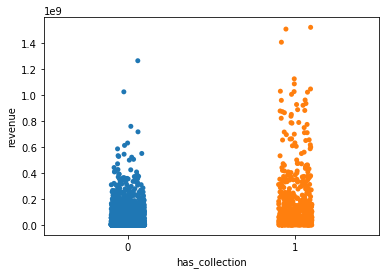

In [32]:
sns.stripplot(x=train.has_collection,y=train.revenue)

<AxesSubplot:xlabel='has_collection', ylabel='revenue'>

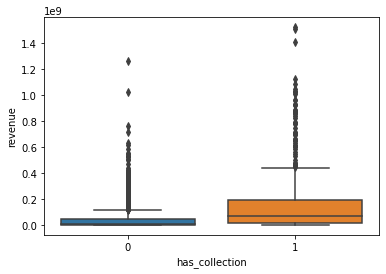

In [33]:
sns.boxplot(x=train.has_collection,y=train.revenue)

In [34]:
has_collection=[]

for i in test.belongs_to_collection:
    d=get_dict(i)
    if d != {}:
        has_collection.append(1)
    else:
        has_collection.append(0)

In [35]:
test['has_collection']=has_collection

In [36]:
train.drop('belongs_to_collection', axis=1, inplace=True)

In [37]:
test.drop('belongs_to_collection', axis=1, inplace=True)

### budget

<AxesSubplot:xlabel='budget', ylabel='revenue'>

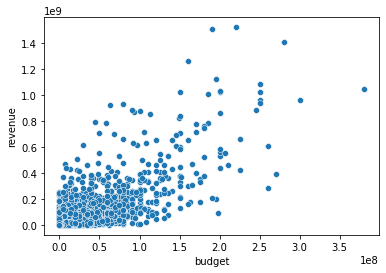

In [38]:

sns.scatterplot(x=train.budget,y=train.revenue)

### genres

In [39]:
train.genres.isnull().sum()

7

In [40]:
test.genres.isnull().sum()

16

In [41]:
# train.genres.mode()

In [42]:
# train.genres=train.genres.fillna(train.genres.mode())

In [43]:
# train.genres.isnull().sum()

In [44]:
# train.genres.value_counts(dropna=False)

In [45]:
no_of_genre=[]

for i in train.genres:
    d=get_dict(i)

    no_of_genre.append(len(d))

In [46]:
train['no_of_genre']=no_of_genre

In [47]:
train.head(2)

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0,1,1
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0,1,4


In [48]:
no_of_genre=[]

for i in test.genres:
    d=get_dict(i)

    no_of_genre.append(len(d))

In [49]:
test['no_of_genre']=no_of_genre

<AxesSubplot:xlabel='no_of_genre', ylabel='revenue'>

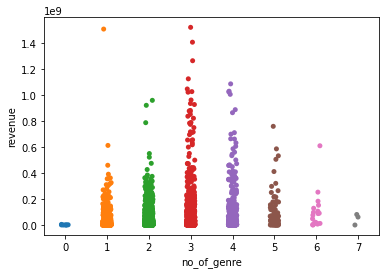

In [50]:
sns.stripplot(x=train.no_of_genre,y=train.revenue)

In [51]:
# list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x!={} else []).values)

In [52]:
total_count_genre=[]

for i in train.genres:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_genre.append(j['name'])
        

In [53]:
Counter(total_count_genre).most_common(10)

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260)]

In [54]:
# top_12=Counter(total_count_genre).most_common(15)

In [55]:
top_genres=[]

In [56]:
for i in Counter(total_count_genre).most_common(10):
#     print(i[0])
    top_genres.append(i[0])

In [57]:
top_genres

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Romance',
 'Crime',
 'Adventure',
 'Horror',
 'Science Fiction',
 'Family']

In [58]:
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [59]:
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)

In [60]:
train.head(2)

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0,1,1,Comedy,0,1,0,0,0,0,0,0,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0,1,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1


In [61]:
total_count_genre=[]

for i in test.genres:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_genre.append(j['name'])

In [62]:
Counter(total_count_genre).most_common(10)

[('Drama', 2145),
 ('Comedy', 1577),
 ('Thriller', 1080),
 ('Action', 994),
 ('Romance', 864),
 ('Adventure', 677),
 ('Crime', 615),
 ('Science Fiction', 454),
 ('Horror', 434),
 ('Family', 415)]

In [63]:
top_genres=[]
for i in Counter(total_count_genre).most_common(10):
#     print(i[0])
    top_genres.append(i[0])

In [64]:
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [65]:
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)

In [66]:
test.head(2)

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,popularity2,rating,totalVotes,has_collection,no_of_genre,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,genre_Science Fiction,genre_Horror,genre_Family
0,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.468,6.6,91.0,1,4,Adventure Animation Family Fantasy,0,0,0,0,0,1,0,0,0,1
1,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",3.649,4.5,51.0,0,2,Horror Science Fiction,0,0,0,0,0,0,0,1,1,0


In [67]:
train.drop(['genres','all_genres'], axis=1, inplace=True)

In [68]:
test.drop(['genres','all_genres'], axis=1, inplace=True)

### homepage

In [69]:
homepage_exit=[]
for i in train.homepage:
    if str(i)=='nan':
        homepage_exit.append(0)
    else:
        homepage_exit.append(1)

In [70]:
train['homepage_exit']=homepage_exit

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='homepage_exit', ylabel='revenue'>

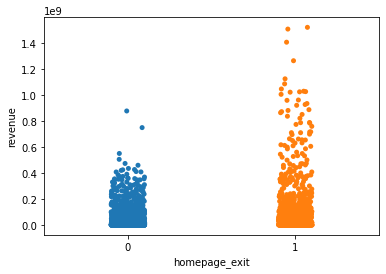

In [71]:
sns.stripplot(train.homepage_exit, train.revenue)

In [72]:
homepage_exit=[]
for i in test.homepage:
    if str(i)=='nan':
        homepage_exit.append(0)
    else:
        homepage_exit.append(1)

In [73]:
test['homepage_exit']=homepage_exit

In [74]:
train.drop('homepage', axis=1, inplace=True)

In [75]:
test.drop('homepage', axis=1, inplace=True)

### imdb_id

In [76]:
train.imdb_id

0       tt2637294
1       tt0368933
2       tt2582802
3       tt1821480
4       tt1380152
          ...    
2995    tt0109403
2996    tt2364975
2997    tt0116908
2998    tt0343135
2999    tt1600195
Name: imdb_id, Length: 3000, dtype: object

In [77]:
train.drop('imdb_id', axis=1, inplace=True)

In [78]:
test.drop('imdb_id', axis=1, inplace=True)

### original_language

In [79]:
orignal_lang_english=[]

for i in train.original_language:
    if str(i)=='en':
        orignal_lang_english.append(1)
    else:
        orignal_lang_english.append(0)

In [80]:
train['orignal_lang_english']=orignal_lang_english

<AxesSubplot:xlabel='orignal_lang_english', ylabel='revenue'>

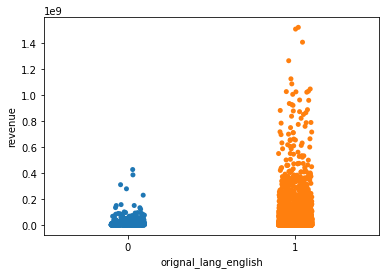

In [81]:
sns.stripplot(x=train.orignal_lang_english,y=train.revenue)

In [82]:
orignal_lang_english=[]

for i in test.original_language:
    if str(i)=='en':
        orignal_lang_english.append(1)
    else:
        orignal_lang_english.append(0)

In [83]:
test['orignal_lang_english']=orignal_lang_english

In [84]:
train.drop('original_language', axis=1, inplace=True)

In [85]:
test.drop('original_language', axis=1, inplace=True)

### original_title

In [86]:
train.original_title

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                           마린보이
                          ...                   
2995                                     Chasers
2996                                 Vi är bäst!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: original_title, Length: 3000, dtype: object

In [87]:
train.drop(['original_title'], axis=1, inplace=True)
test.drop(['original_title'], axis=1, inplace=True)

### overview

In [88]:
train.overview

0       When Lou, who has become the "father of the In...
1       Mia Thermopolis is now a college graduate and ...
2       Under the direction of a ruthless instructor, ...
3       Vidya Bagchi (Vidya Balan) arrives in Kolkata ...
4       Marine Boy is the story of a former national s...
                              ...                        
2995    Military men Rock Reilly and Eddie Devane are ...
2996    Three girls in 1980s Stockholm decide to form ...
2997    Samantha Caine, suburban homemaker, is the ide...
2998    Reuben Feffer is a guy who's spent his entire ...
2999    A young man sets out to uncover the truth abou...
Name: overview, Length: 3000, dtype: object

In [89]:
train.drop('overview', axis=1, inplace=True)

In [90]:
test.drop('overview', axis=1, inplace=True)

### popularity

In [91]:
train.popularity

0        6.575393
1        8.248895
2       64.299990
3        3.174936
4        1.148070
          ...    
2995     9.853270
2996     3.727996
2997    14.482345
2998    15.725542
2999    10.512109
Name: popularity, Length: 3000, dtype: float64

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

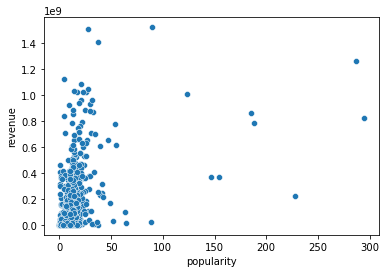

In [92]:
sns.scatterplot(x=train.popularity,y=train.revenue)

In [93]:
train.popularity.corr(train.revenue)

0.4614602896736129

### poster_path

In [94]:
train.poster_path

0       /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1       /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2       /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3       /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4       /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
                      ...               
2995    /j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg
2996    /sS01LSy6KDrCZAhtkO18UdnWFT1.jpg
2997    /4MENR8x6mYqnZvp2hGjSaPJz64J.jpg
2998    /nIY4kvJTTnxoBR0wycrXng5MOYs.jpg
2999    /cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg
Name: poster_path, Length: 3000, dtype: object

In [95]:
train.drop('poster_path', axis=1, inplace=True)

In [96]:
test.drop('poster_path', axis=1, inplace=True)

### production_companies

In [97]:
no_of_prod_comp=[]

for i in train.production_companies:
    d=get_dict(i)

    no_of_prod_comp.append(len(d))

In [98]:
train['no_of_prod_comp']=no_of_prod_comp

In [99]:
train.head(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,homepage_exit,orignal_lang_english,no_of_prod_comp
0,14000000,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,3
1,40000000,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0,1,4,1,1,0,0,1,0,0,0,0,1,0,1,1
2,3300000,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.4,7314.0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,3


<AxesSubplot:xlabel='no_of_prod_comp', ylabel='revenue'>

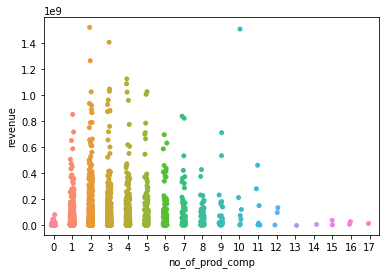

In [100]:
sns.stripplot(x=train.no_of_prod_comp,y=train.revenue)

In [101]:
total_count_production=[]

for i in train.production_companies:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_production.append(j['name'])

In [102]:
Counter(total_count_production).most_common(10)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61)]

In [103]:
top_production_comp=[]

In [104]:
for i in Counter(total_count_production).most_common(10):
#     print(i[0])
    top_production_comp.append(i[0])

In [105]:
train['all_prod_comp'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [106]:
for i in top_production_comp:
    train['prod_comp_' + i] = train['all_prod_comp'].apply(lambda x: 1 if i in x else 0)

In [107]:
train.head(3)

,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,homepage_exit,orignal_lang_english,no_of_prod_comp,all_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation
0,14000000,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,3,Metro-Goldwyn-Mayer (MGM) Paramount Pictures U...,0,0,1,0,0,1,0,0,0,0
1,40000000,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0,1,4,1,1,0,0,1,0,0,0,0,1,0,1,1,Walt Disney Pictures,0,0,0,0,0,0,0,0,1,0
2,3300000,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.4,7314.0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,3,Blumhouse Productions Bold Films Right of Way ...,0,0,0,0,0,0,0,0,0,0


In [108]:
no_of_prod_comp=[]

for i in test.production_companies:
    d=get_dict(i)

    no_of_prod_comp.append(len(d))

In [109]:
test['no_of_prod_comp']=no_of_prod_comp

In [110]:
total_count_production=[]

for i in test.production_companies:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_production.append(j['name'])

In [111]:
Counter(total_count_production).most_common(10)

[('Warner Bros.', 289),
 ('Universal Pictures', 275),
 ('Paramount Pictures', 232),
 ('Twentieth Century Fox Film Corporation', 203),
 ('Columbia Pictures', 145),
 ('Metro-Goldwyn-Mayer (MGM)', 123),
 ('New Line Cinema', 123),
 ('Touchstone Pictures', 95),
 ('Walt Disney Pictures', 85),
 ('Canal+', 84)]

In [112]:
top_production_comp=[]
for i in Counter(total_count_production).most_common(10):
#     print(i[0])
    top_production_comp.append(i[0])

In [113]:
test['all_prod_comp'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [114]:
for i in top_production_comp:
    test['prod_comp_' + i] = test['all_prod_comp'].apply(lambda x: 1 if i in x else 0)

In [115]:
train.drop(['production_companies','all_prod_comp'], axis=1, inplace=True)

In [116]:
test.drop(['production_companies','all_prod_comp'], axis=1, inplace=True)

### production_countries

In [117]:
production_country_usa=[]

for i in train.production_countries:
    d=get_dict(i)
    if d!={}:
#         print(d)
#         print(d[0]['name'])
        if 'United States of America' in (d[0]['name']):
            production_country_usa.append(1)
        else:
            production_country_usa.append(0)
    else:
        production_country_usa.append(0)

In [118]:
train['production_country_usa']=production_country_usa

<AxesSubplot:xlabel='production_country_usa', ylabel='revenue'>

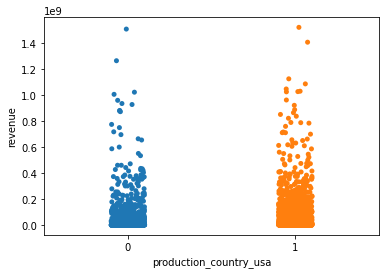

In [119]:
sns.stripplot(x=train.production_country_usa,y=train.revenue)

In [120]:
production_country_usa=[]

for i in test.production_countries:
    d=get_dict(i)
    if d!={}:
#         print(d)
#         print(d[0]['name'])
        if 'United States of America' in (d[0]['name']):
            production_country_usa.append(1)
        else:
            production_country_usa.append(0)
    else:
        production_country_usa.append(0)

In [121]:
test['production_country_usa']=production_country_usa

In [122]:
no_prod_countries=[]

for i in train.production_countries:
    d=get_dict(i)

    no_prod_countries.append(len(d))

In [123]:
train['no_prod_countries']=no_prod_countries

<AxesSubplot:xlabel='no_prod_countries', ylabel='revenue'>

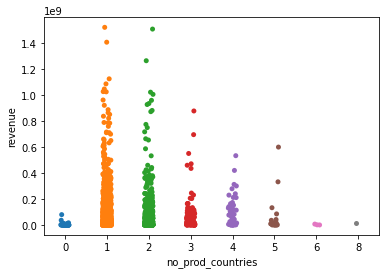

In [124]:
sns.stripplot(x=train.no_prod_countries,y=train.revenue)

In [125]:
no_prod_countries=[]

for i in test.production_countries:
    d=get_dict(i)

    no_prod_countries.append(len(d))

In [126]:
test['no_prod_countries']=no_prod_countries

In [127]:
train.head(3)

,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,homepage_exit,orignal_lang_english,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,production_country_usa,no_prod_countries
0,14000000,6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,0,1,1
1,40000000,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0,1,4,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1
2,3300000,64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.4,7314.0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,1,1


In [128]:
train.drop('production_countries', axis=1, inplace=True)

In [129]:
test.drop('production_countries', axis=1, inplace=True)

### release_date

In [130]:
train.release_date

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
          ...   
2995     4/22/94
2996     3/28/13
2997    10/11/96
2998     1/16/04
2999     9/22/11
Name: release_date, Length: 3000, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No of releases')

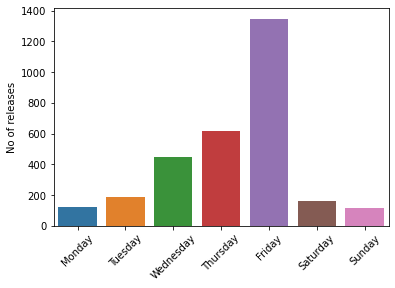

In [131]:
def date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
    
train['release_date'] =train['release_date'].fillna('1/1/90').apply(lambda x: date(x))
test['release_date']  =test['release_date'].fillna('1/1/90').apply(lambda x: date(x))

#from datetime import datetime
train['release_date'] = train['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
test['release_date']  = test['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

train['release_day']   = train['release_date'].apply(lambda x:x.weekday())
train['release_month'] = train['release_date'].apply(lambda x:x.month)
train['release_year']  = train['release_date'].apply(lambda x:x.year)

test['release_day']   = test['release_date'].apply(lambda x:x.weekday())
test['release_month'] = test['release_date'].apply(lambda x:x.month)
test['release_year']  = test['release_date'].apply(lambda x:x.year)

day=train['release_day'].value_counts().sort_index()
sns.barplot(day.index,day)
plt.gca().set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],rotation='45')
plt.ylabel('No of releases')

In [132]:
day=train.release_day.value_counts().sort_index()

In [133]:
day

0     124
1     190
2     449
3     615
4    1348
5     161
6     113
Name: release_day, dtype: int64

In [134]:
# release_dd=[]
# release_mm=[]
# release_yyyy=[]


# for i in train.release_date:
    
#     year=i.split('/')[2]
#     if int(year) <= 19:
#         year= '20'+year
#     else:
#         year='19'+year
        
    
#     release_mm.append(int(i.split('/')[0]))
#     release_dd.append(int(i.split('/')[1]))
#     release_yyyy.append(int(year))
    
    
# train['release_dd']=release_dd
# train['release_mm']=release_mm
# train['release_yyyy']=release_yyyy

In [135]:
train.head(2)

,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,homepage_exit,orignal_lang_english,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,production_country_usa,no_prod_countries,release_day,release_month,release_year
0,14000000,6.575393,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,0,1,1,4,2,2015
1,40000000,8.248895,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0,1,4,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,4,8,2004


In [136]:
# plt.figure(figsize = (15,8))
# sns.stripplot(x=train.release_dd, y=train.revenue, data=train)

<AxesSubplot:xlabel='release_month', ylabel='revenue'>

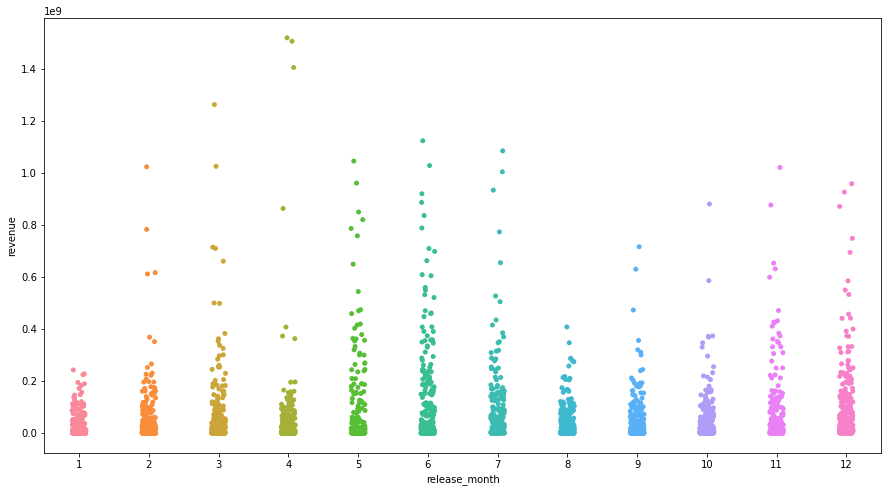

In [137]:
plt.figure(figsize = (15,8))
sns.stripplot(x=train.release_month,y=train.revenue)

In [138]:
# release_yyyy

<AxesSubplot:xlabel='release_year', ylabel='revenue'>

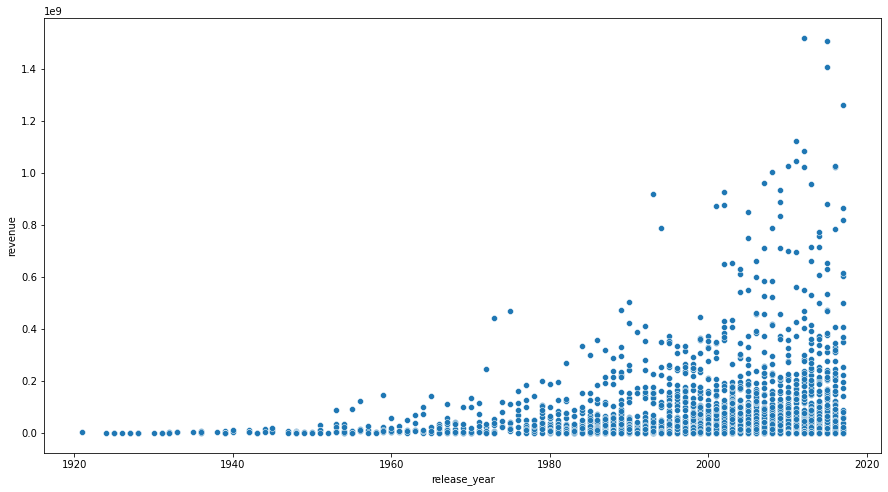

In [139]:
plt.figure(figsize = (15,8))
sns.scatterplot(x=train.release_year,y=train.revenue)

In [140]:
test.head(2)

,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,genre_Science Fiction,genre_Horror,genre_Family,homepage_exit,orignal_lang_english,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Canal+,production_country_usa,no_prod_countries,release_day,release_month,release_year
0,0,3.851534,2007-07-14,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.468,6.6,91.0,1,4,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,7,2007
1,88000,3.559789,1958-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",3.649,4.5,51.0,0,2,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,5,1958


In [141]:
train.drop('release_date', axis=1, inplace=True)

In [142]:
test.drop('release_date', axis=1, inplace=True)

### runtime

<AxesSubplot:xlabel='runtime', ylabel='revenue'>

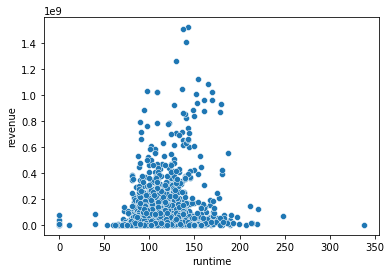

In [143]:
sns.scatterplot(x=train.runtime,y=train.revenue,data=train)

In [144]:
train.runtime=train.runtime.fillna(train.runtime.mean())

In [145]:
test.runtime=test.runtime.fillna(test.runtime.mean())

In [146]:
train.runtime.corr(train.revenue)

0.21636315950953602

### spoken_languages

In [147]:
no_lang_spoken=[]

for i in train.spoken_languages:
    d=get_dict(i)

    no_lang_spoken.append(len(d))

In [148]:
train['no_lang_spoken']=no_lang_spoken

<AxesSubplot:xlabel='no_lang_spoken', ylabel='revenue'>

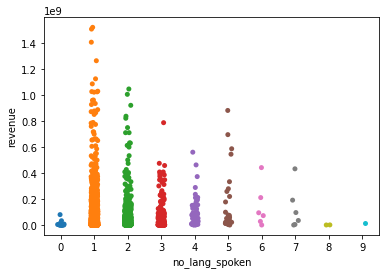

In [149]:
sns.stripplot(x=train.no_lang_spoken,y=train.revenue)

In [150]:
no_lang_spoken=[]

for i in test.spoken_languages:
    d=get_dict(i)

    no_lang_spoken.append(len(d))

In [151]:
test['no_lang_spoken']=no_lang_spoken

In [152]:
total_count_spoken_lang=[]

for i in train.spoken_languages:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_spoken_lang.append(j['name'])

In [153]:
Counter(total_count_spoken_lang).most_common(5)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152)]

In [154]:
spoken_lang_en=[]

for i in train.spoken_languages:
    d=get_dict(i)
    if d!={}:
#         print(d)
#         print(d[0]['name'])
        if 'English' in (d[0]['name']):
            spoken_lang_en.append(1)
        else:
            spoken_lang_en.append(0)
    else:
        spoken_lang_en.append(1)

In [155]:
train['spoken_lang_en']=spoken_lang_en

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spoken_lang_en', ylabel='revenue'>

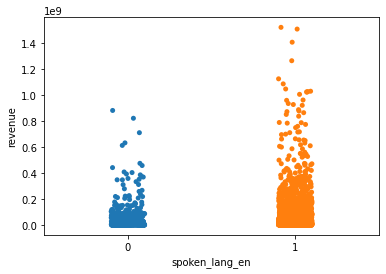

In [156]:
sns.stripplot(train.spoken_lang_en, train.revenue, data=train)

In [157]:
spoken_lang_en=[]

for i in test.spoken_languages:
    d=get_dict(i)
    if d!={}:
#         print(d)
#         print(d[0]['name'])
        if 'English' in (d[0]['name']):
            spoken_lang_en.append(1)
        else:
            spoken_lang_en.append(0)
    else:
        spoken_lang_en.append(1)

In [158]:
test['spoken_lang_en']=spoken_lang_en

In [159]:
test.head(3)

,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,genre_Science Fiction,genre_Horror,genre_Family,homepage_exit,orignal_lang_english,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Canal+,production_country_usa,no_prod_countries,release_day,release_month,release_year,no_lang_spoken,spoken_lang_en
0,0,3.851534,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.468,6.6,91.0,1,4,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,7,2007,2,1
1,88000,3.559789,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",3.649,4.5,51.0,0,2,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,5,1958,1,1
2,0,8.085194,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",9.012,6.1,176.0,0,2,0,1,0,0,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,1,1,4,5,1997,1,1


In [160]:
train.drop('spoken_languages', axis=1, inplace=True)

In [161]:
test.drop('spoken_languages', axis=1, inplace=True)

### status

In [162]:
train.status.value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [163]:
# sns.stripplot(train.released_status, train.revenue, data=train)

In [164]:
test.status.value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [165]:
train.drop('status', axis=1, inplace=True)

In [166]:
test.drop('status', axis=1, inplace=True)

### tagline

In [167]:
train.tagline.isnull().sum()

597

In [168]:
has_tagline=[]
for i in train.tagline:
#     print(i)
    if str(i)=='nan':
        has_tagline.append(0)
    else:
        has_tagline.append(1)

In [169]:
np.unique(has_tagline, return_counts=True)

(array([0, 1]), array([ 597, 2403], dtype=int64))

In [170]:
train['has_tagline']=has_tagline

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='has_tagline', ylabel='revenue'>

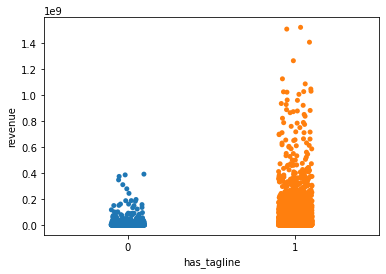

In [171]:
sns.stripplot(train.has_tagline, train.revenue)

In [172]:
test.tagline.isnull().sum()

863

In [173]:
has_tagline=[]
for i in test.tagline:
#     print(i)
    if str(i)=='nan':
        has_tagline.append(0)
    else:
        has_tagline.append(1)

In [174]:
test['has_tagline']=has_tagline

In [175]:
train.drop('tagline', axis=1, inplace=True)

In [176]:
test.drop('tagline', axis=1, inplace=True)

### title

In [177]:
train.title

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                     Marine Boy
                          ...                   
2995                                     Chasers
2996                            We Are the Best!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: title, Length: 3000, dtype: object

In [178]:
train.drop('title', axis=1, inplace=True)

In [179]:
test.drop('title', axis=1, inplace=True)

### keywords

In [180]:
train.Keywords.isnull().sum()

276

In [181]:
has_keyword=[]
for i in train.Keywords:
#     print(i)
    if str(i)=='nan':
        has_keyword.append(0)
    else:
        has_keyword.append(1)

In [182]:
np.unique(has_keyword, return_counts=True)

(array([0, 1]), array([ 276, 2724], dtype=int64))

In [183]:
train['has_keyword']=has_keyword

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='has_keyword', ylabel='revenue'>

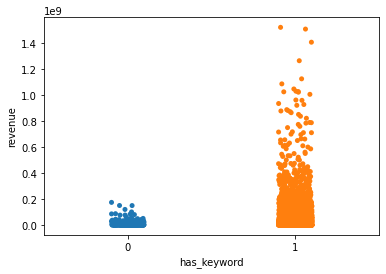

In [184]:
sns.stripplot(train.has_keyword, train.revenue)

In [185]:
has_keyword=[]
for i in test.Keywords:
#     print(i)
    if str(i)=='nan':
        has_keyword.append(0)
    else:
        has_keyword.append(1)

In [186]:
test['has_keyword']=has_keyword

In [187]:
no_of_keyword=[]

for i in train.Keywords:
    d=get_dict(i)

    no_of_keyword.append(len(d))

In [188]:
train['no_of_keyword']=no_of_keyword

<AxesSubplot:xlabel='no_of_keyword', ylabel='revenue'>

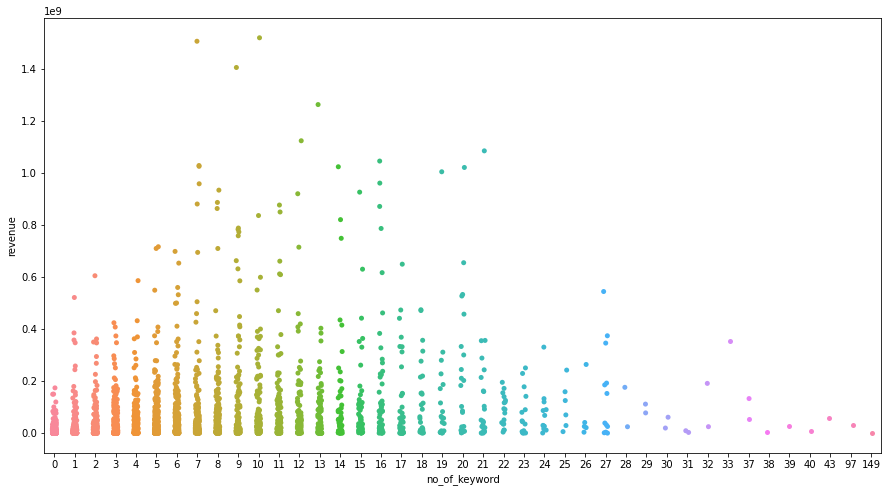

In [189]:
plt.figure(figsize = (15,8))
sns.stripplot(x=train.no_of_keyword,y=train.revenue)

In [190]:
no_of_keyword=[]

for i in test.Keywords:
    d=get_dict(i)

    no_of_keyword.append(len(d))

In [191]:
test['no_of_keyword']=no_of_keyword

In [192]:
train.drop('Keywords', axis=1, inplace=True)

In [193]:
test.drop('Keywords', axis=1, inplace=True)

### cast

In [194]:
no_cast=[]

for i in train.cast:
    d=get_dict(i)

    no_cast.append(len(d))

In [195]:
train['no_cast']=no_cast

<AxesSubplot:xlabel='no_cast', ylabel='revenue'>

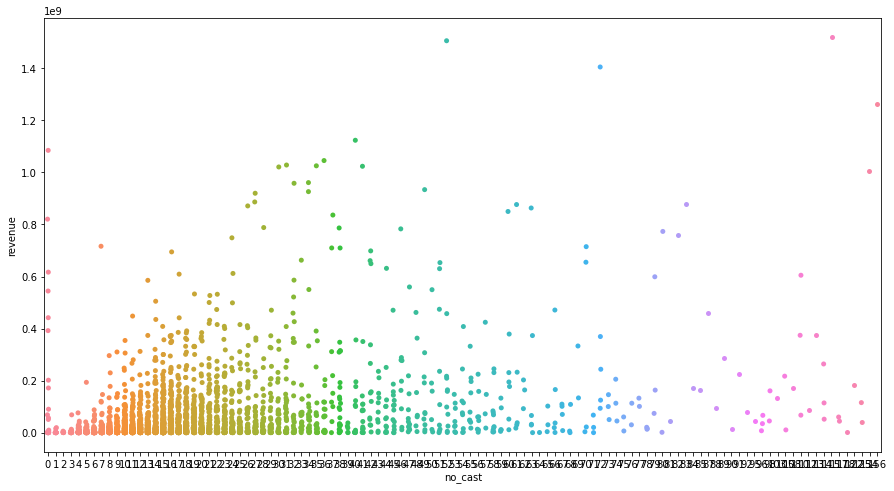

In [196]:
plt.figure(figsize = (15,8))
sns.stripplot(x=train.no_cast,y=train.revenue)

In [197]:
no_cast=[]

for i in test.cast:
    d=get_dict(i)

    no_cast.append(len(d))

In [198]:
test['no_cast']=no_cast

In [199]:
train.drop('cast', axis=1, inplace=True)

In [200]:
test.drop('cast', axis=1, inplace=True)

### crew

In [201]:
no_crew=[]

for i in train.crew:
    d=get_dict(i)

    no_crew.append(len(d))

In [202]:
train['no_crew']=no_crew

<AxesSubplot:xlabel='no_crew', ylabel='revenue'>

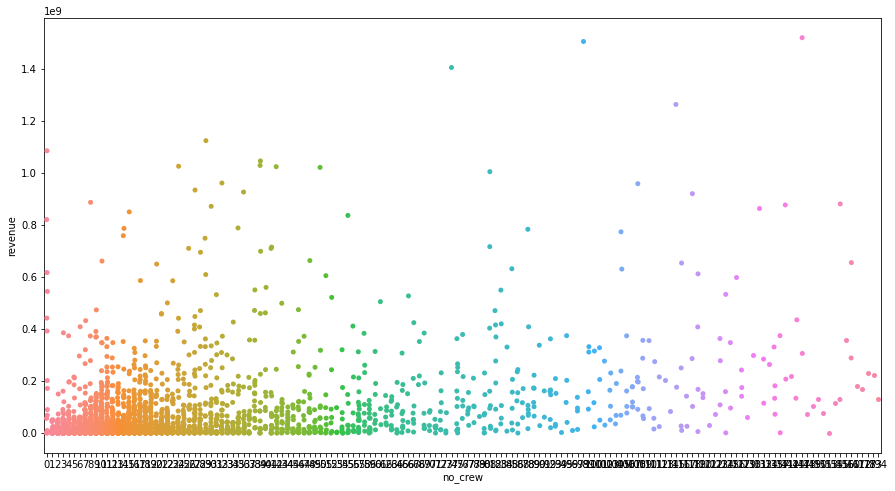

In [203]:
plt.figure(figsize = (15,8))
sns.stripplot(x=train.no_crew,y=train.revenue)

In [204]:
no_crew=[]

for i in test.crew:
    d=get_dict(i)

    no_crew.append(len(d))

In [205]:
test['no_crew']=no_crew

In [206]:
train.drop('crew', axis=1, inplace=True)

In [207]:
test.drop('crew', axis=1, inplace=True)

### popularity2

In [208]:
train.popularity2.isnull().sum()

118

In [209]:
test.popularity2.isnull().sum()

179

<AxesSubplot:xlabel='popularity2', ylabel='Count'>

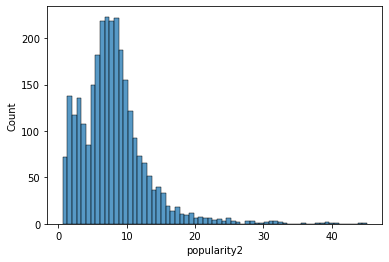

In [210]:
sns.histplot(train.popularity2)

<AxesSubplot:xlabel='popularity2', ylabel='Count'>

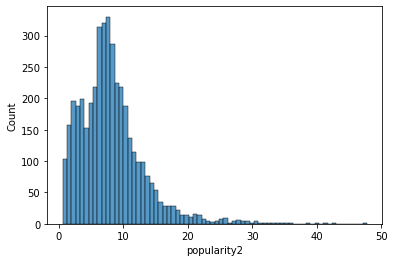

In [211]:
sns.histplot(test.popularity2)

In [212]:
train.popularity2=train.popularity2.fillna(train.popularity2.median())

In [213]:
test.popularity2=test.popularity2.fillna(test.popularity2.median())

<AxesSubplot:xlabel='popularity2', ylabel='revenue'>

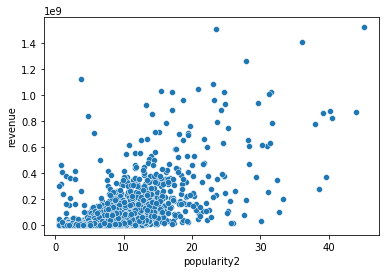

In [214]:
sns.scatterplot(x=train.popularity2,y=train.revenue)

### rating

In [215]:
train.rating.isnull().sum()

118

In [216]:
test.rating.isnull().sum()

179

<AxesSubplot:xlabel='rating', ylabel='Count'>

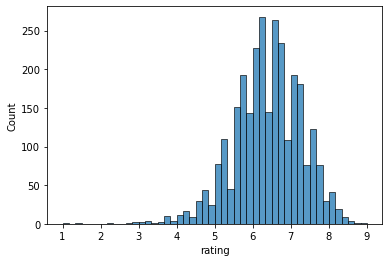

In [217]:
sns.histplot(train.rating)

<AxesSubplot:xlabel='rating', ylabel='Count'>

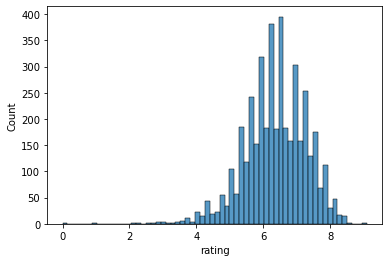

In [218]:
sns.histplot(test.rating)

In [219]:
train.rating=train.rating.fillna(train.rating.mean())

In [220]:
test.rating=test.rating.fillna(test.rating.mean())

<AxesSubplot:xlabel='rating', ylabel='revenue'>

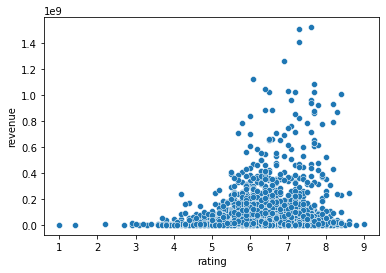

In [221]:
sns.scatterplot(x=train.rating,y=train.revenue)

### totalVotes

In [222]:
train.totalVotes.isnull().sum()

118

In [223]:
test.totalVotes.isnull().sum()

179

<AxesSubplot:xlabel='totalVotes', ylabel='Count'>

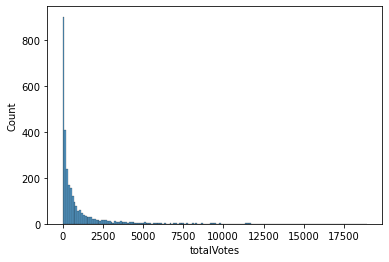

In [224]:
sns.histplot(train.totalVotes)

<AxesSubplot:xlabel='totalVotes', ylabel='Count'>

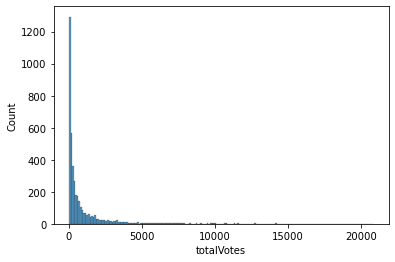

In [225]:
sns.histplot(test.totalVotes)

In [226]:
train.totalVotes=train.totalVotes.fillna(train.totalVotes.median())

In [227]:
test.totalVotes=test.totalVotes.fillna(test.totalVotes.median())

<AxesSubplot:xlabel='totalVotes', ylabel='revenue'>

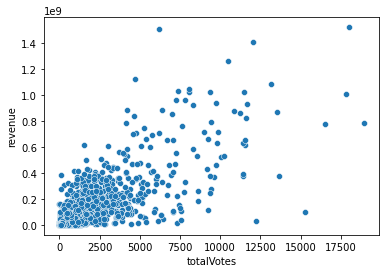

In [228]:
sns.scatterplot(x=train.totalVotes,y=train.revenue)

In [229]:
## model training

In [230]:
train['popularity'] = np.log1p(train['popularity'])   #log(1+x)  #expm1 - inverse
train['popularity2'] = np.log1p(train['popularity2'])
train['budget'] = np.log1p(train['budget'])
train['runtime'] = np.log1p(train['runtime'])
train['totalVotes'] = np.log1p(train['totalVotes'])
train['revenue'] = np.log1p(train['revenue'])

In [231]:
test['popularity'] = np.log1p(test['popularity'])   #log(1+x)  #expm1 - inverse
test['popularity2'] = np.log1p(test['popularity2'])
test['budget'] = np.log1p(test['budget'])
test['runtime'] = np.log1p(test['runtime'])
test['totalVotes'] = np.log1p(test['totalVotes'])

In [232]:
train.head(3)

,budget,popularity,runtime,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,homepage_exit,orignal_lang_english,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,production_country_usa,no_prod_countries,release_day,release_month,release_year,no_lang_spoken,spoken_lang_en,has_tagline,has_keyword,no_of_keyword,no_cast,no_crew
0,16.454568,2.024905,4.543295,16.326300,2.433613,5.0,6.180017,1,1,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,1,0,0,0,0,1,1,4,2,2015,1,1,1,1,4,24,72
1,17.504390,2.224504,4.736198,18.370959,2.786800,6.4,7.332369,1,4,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,4,8,2004,1,1,1,1,4,20,9
2,15.009433,4.178992,4.663439,16.387512,3.298869,8.4,8.897682,0,1,1,0,0,0,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,1,1,4,10,2014,1,1,1,1,12,51,64


In [233]:
train.shape

(3000, 44)

In [234]:
test.head(3)

,budget,popularity,runtime,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,genre_Science Fiction,genre_Horror,genre_Family,homepage_exit,orignal_lang_english,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Canal+,production_country_usa,no_prod_countries,release_day,release_month,release_year,no_lang_spoken,spoken_lang_en,has_tagline,has_keyword,no_of_keyword,no_cast,no_crew
0,0.000000,1.579295,4.510860,2.010627,6.6,4.521789,1,4,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,7,2007,2,1,1,1,2,7,2
1,11.385103,1.517276,4.189655,1.536652,4.5,3.951244,0,2,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,5,1958,1,1,1,1,8,10,8
2,0.000000,2.206646,4.615121,2.303784,6.1,5.176150,0,2,0,1,0,0,1,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,1,1,4,5,1997,1,1,1,1,4,9,10


In [235]:
test.shape

(4398, 43)

In [236]:
train.isnull().sum().sum()

0

In [237]:
test.isnull().sum().sum()

0

In [239]:
X=train.drop('revenue', axis=1)

In [240]:
y=train.revenue

In [ ]:
## feature selection

In [ ]:
# train.corr()

In [ ]:
# plt.figure(figsize=(20,15))
# sns.heatmap(train.corr(), annot=True, linewidths=2)

In [ ]:
# for i in range(len(df_corr)-1):
#     for j in range(i):
#         if abs(df_corr.iloc[i, j]) > threshold:
#             print(df_corr.columns[i])

In [ ]:
# hg

In [241]:

def get_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error( np.expm1(y_true), y_pred ))

In [242]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
X_train.isnull().sum().sum()

0

In [244]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

predict=lr.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

2.072173492480168

In [ ]:
# predict

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dc=DecisionTreeRegressor(random_state=42)

dc.fit(X_train,y_train)

predict=dc.predict(X_test)

predict=np.expm1(predict)

# np.sqrt(mean_squared_log_error( y_test, predict ))
np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rdf=RandomForestRegressor(n_estimators=1000, random_state=42)

rdf.fit(X_train,y_train)

predict=rdf.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rdf=RandomForestRegressor( random_state=42)

rdf.fit(X,y)

predict=rdf.predict(test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
# np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

In [ ]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rdf=RandomForestRegressor()

n_estimators = [50,100,150,200,150,300,350,400,450,500]



max_depth = [2,5,6,7,8,9,10]


r_grid = {'n_estimators': n_estimators,
          'max_depth': max_depth,}

In [ ]:
rfr_random = RandomizedSearchCV(estimator=rdf, param_distributions=r_grid,cv = 5, random_state=42, n_jobs=-1)

In [ ]:
rfr_random.fit(X_train, y_train)

In [ ]:
rfr_random.best_params_

In [ ]:
predict=rfr_random.predict(X_test)
predict=np.expm1(predict)

np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

In [ ]:
rfr_random.best_estimator_.feature_importances_

In [ ]:
feature_imp = [col for col in zip(X_train.columns, rfr_random.best_estimator_.feature_importances_)]
feature_imp.sort(key=lambda x:x[1], reverse=True)

In [ ]:
top_features=[]
for i in range(25):
#     print(feature_imp[i][0])
    top_features.append(feature_imp[i][0])

In [ ]:
top_features

In [ ]:
Z=X[['budget',
 'popularity',
 'release_yyyy',
 'runtime',
 'no_cast',
 'release_dd',
 'no_crew',
 'no_keyword',
 'has_collection',
 'release_mm',
 'no_of_genre',
 'no_prod_countries',
 'no_of_prod_comp',
 'no_lang_spoken',
 'homepage_exit',
 'genre_Crime',
 'genre_Action',
 'production_country_usa',
 'genre_Thriller',
 'orignal_lang_english',
 'genre_Romance',
 'genre_Adventure',
 'genre_Horror',
 'genre_Family',
 'genre_Drama']]
Z

In [ ]:
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rdf=RandomForestRegressor(random_state=42)

rdf.fit(Z_train,y_train)

predict=rdf.predict(Z_test)
prediction=np.expm1(predict)

from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( np.expm1(y_test), prediction ))

In [ ]:
test_Z=test[['budget',
 'popularity',
 'release_yyyy',
 'runtime',
 'no_cast',
 'release_dd',
 'no_crew',
 'no_keyword',
 'has_collection',
 'release_mm',
 'no_of_genre',
 'no_prod_countries',
 'no_of_prod_comp',
 'no_lang_spoken',
 'homepage_exit',
 'genre_Crime',
 'genre_Action',
 'production_country_usa',
 'genre_Thriller',
 'orignal_lang_english',
 'genre_Romance',
 'genre_Adventure',
 'genre_Horror',
 'genre_Family',
 'genre_Drama']]


In [ ]:
test_Z

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rdf=RandomForestRegressor(n_estimators=216,max_depth=7, random_state=42)

rdf.fit(Z,y)


predict=rdf.predict(test_Z)

predict=np.expm1(predict)

df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

In [ ]:
from xgboost import XGBRegressor


xgb=XGBRegressor(max_depth=5, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                            gamma=1.45, 
                            subsample=0.8, 
                            colsample_bytree=0.7, 
                            colsample_bylevel=0.5)

xgb.fit(X_train,y_train)

predict=xgb.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

In [ ]:
predict=model.predict(test)

predict=np.expm1(predict)

df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

In [245]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor(verbose=False, random_state=42)

cat.fit(X_train,y_train)

predict=cat.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

1.9208841300328254